# Exploratory Data Analysis for Revenue Forecasting

This notebook performs initial exploratory analysis on the sales data to understand its structure, trends, and characteristics.

## 1. Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '../data/sales_data.csv'
data = pd.read_csv(file_path)

# Convert to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.set_index('Date', inplace=True)

# Display the first few rows
data.head()

,Product,Category,Price,Quantity,Rating,Revenue
Date,,,,,,
2018-01-01,microwave,electronics,300,39,10,11700
2018-01-01,fragrance,comestic,50,34,10,1700
2018-01-01,oven,electronics,600,2,9,1200
2018-01-01,smartphone,electronics,500,5,7,2500
2018-01-01,fragrance,comestic,50,25,9,1250


## 2. Data Overview and Summary Statistics

In [2]:
# Summary statistics
data.describe()

,Price,Quantity,Rating,Revenue
count,21910.000000,21910.000000,21910.000000,21910.000000
mean,377.602921,25.530945,5.513692,9615.002967
std,415.637823,14.433525,2.879329,13328.088455
min,10.000000,1.000000,1.000000,10.000000
25%,20.000000,13.000000,3.000000,425.000000
50%,175.000000,26.000000,6.000000,1800.000000
75%,800.000000,38.000000,8.000000,15000.000000
max,1200.000000,50.000000,10.000000,60000.000000


## 3. Visualizing Revenue Over Time

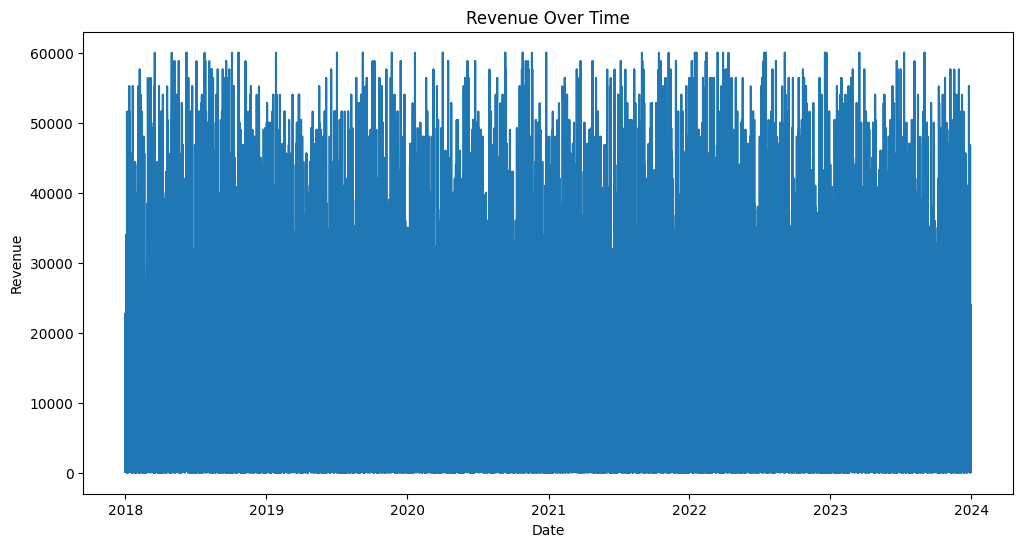

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Revenue"])
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

## 4. Check for Seasonality and Trends

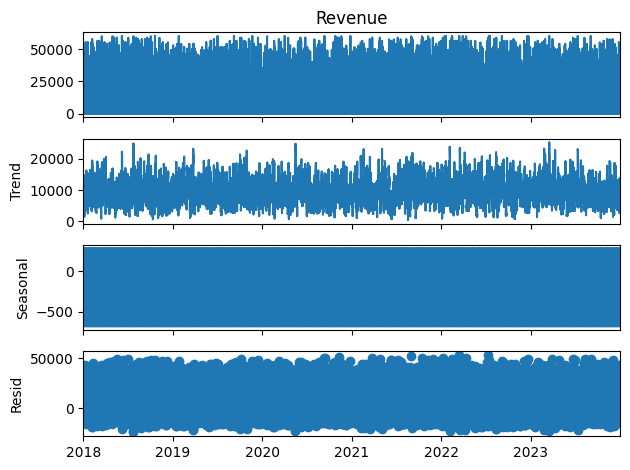

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data["Revenue"], model="additive", period=12)
decomposition.plot()
plt.show()

## 5. Stationarity Test (ADF Test)

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data["Revenue"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -148.32010817406095
p-value: 0.0
